In [1]:
from datetime import datetime

from finance_utils.backtest import Backtest
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from_beginning = '1987-01-01'

[*********************100%%**********************]  1 of 1 completed


---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.05315652316255948
Avg Annual Return (Ari): 0.08763133095017125
Volatility (Std): 0.25606570823405983
Sharpe Ratio: 0.20758938605700042
Downside Volatility: 0.18378685215850396
Sortino Ratio: 0.2892291942446215
VaR 99: -0.04221279649156794
VaR 99 (Year): -0.4779677337926634
CVaR 99: -0.06390772924618005
CVaR 99 (Year): -0.4779677337926634
Initial Value: 2540.10009765625
Peak Value: 33154.12109375
Final Value: 17113.55078125
Max Drawdown: 0.6518186042408531
Avg Drawdown: 0.25419503629941914
Calmar Ratio: 0.08155109844474098
Sterling Ratio: 0.20911707772273658
Monthly Stats: 
      count      mean       std       min       25%       50%       75%  \
Date                                                                      
1      38.0  0.001088  0.073812 -0.148937 -0.055700  0.007082  0.056914   
2      38.0  0.015634  0.060133 -0.119786 -0.018577  0.012509  0.064854   
3      38.0 -0.008796  0.0

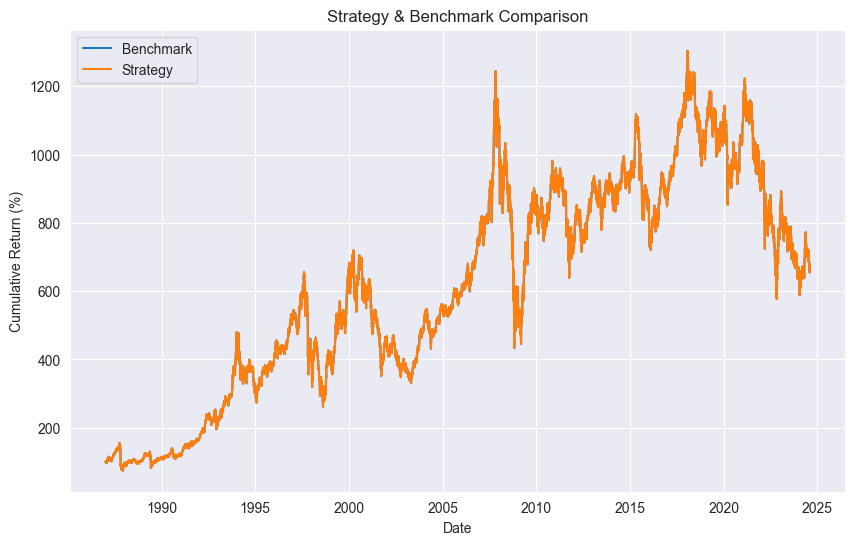

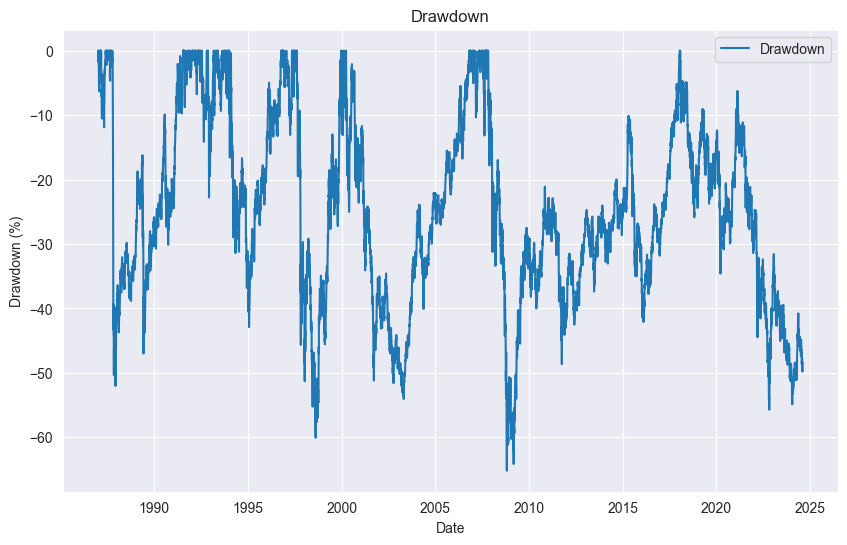

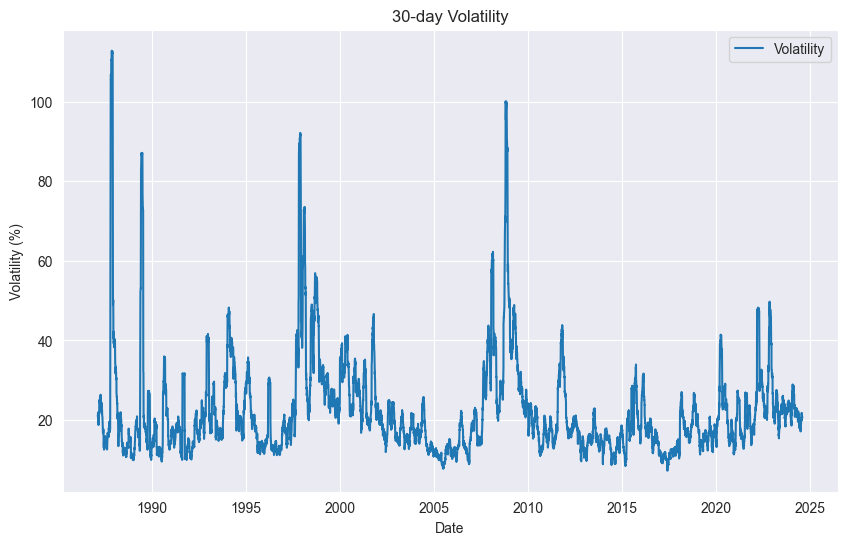

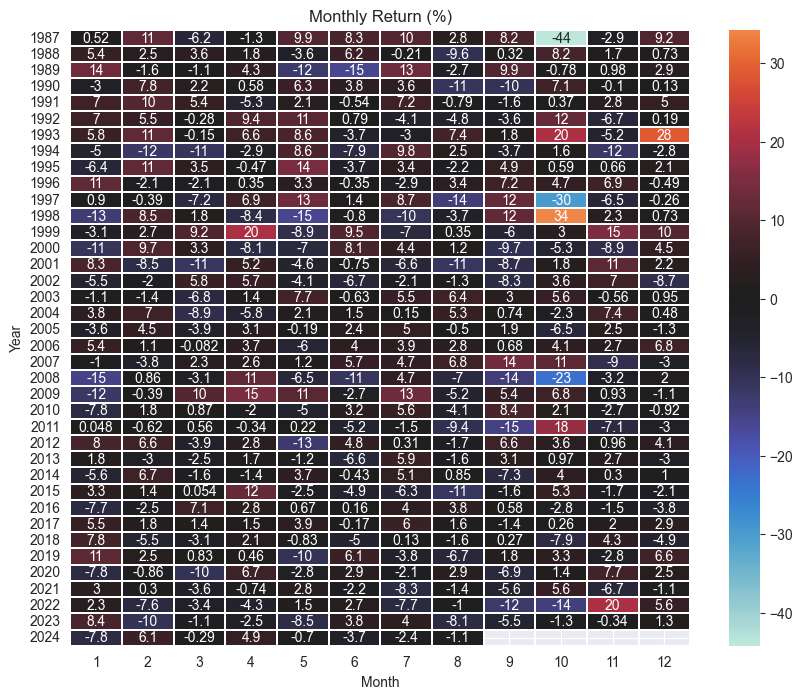

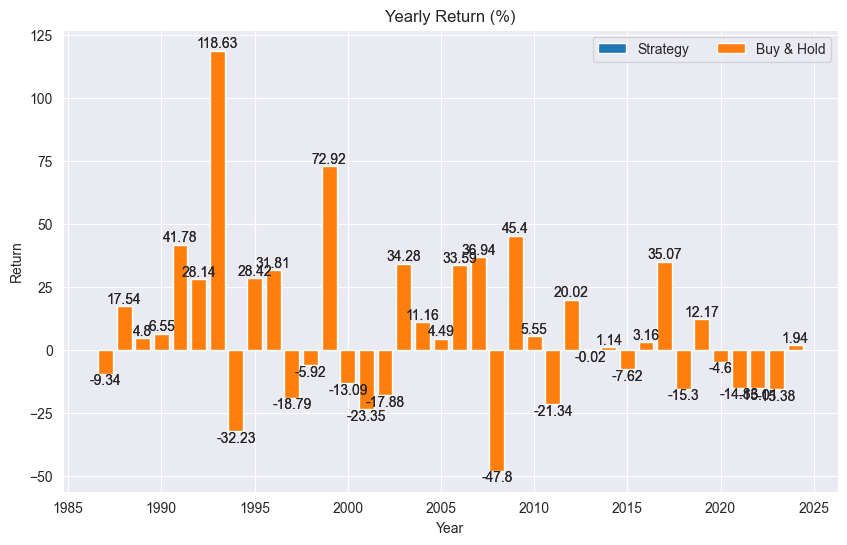

In [3]:
start_date = from_beginning
hsi = yf.download('^HSI', start=start_date)

hsi_df = pd.DataFrame()
hsi_df['Price'] = hsi['Adj Close']
hsi_df['Value'] = hsi['Adj Close']
hsi_df['Return'] = hsi['Adj Close'].pct_change()

test_hsi = Backtest(hsi_df)

In [4]:
hsi_monthly = test_hsi.results['Monthly Return']
# set time here
today = datetime.now()
last_10_years = f'{today.year - 9}-01-01'
last_20_years = f'{today.year - 19}-01-01'
last_30_years = f'{today.year - 29}-01-01'
start_date = f'1900-01-01'
choices = [last_10_years, last_20_years, last_30_years, start_date]

Win Rates: Month
1     70.000000
2     50.000000
3     40.000000
4     70.000000
5     40.000000
6     50.000000
7     40.000000
8     30.000000
9     33.333333
10    55.555556
11    44.444444
12    55.555556
Name: Win Rate %, dtype: float64


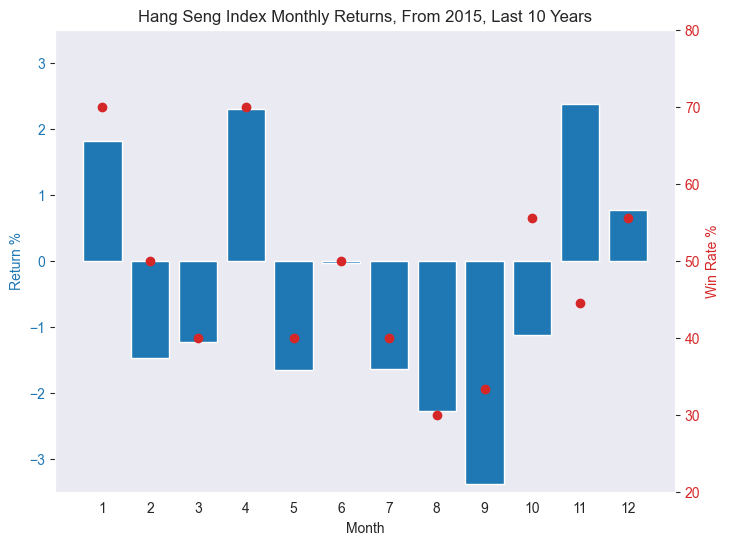

Win Rates: Month
1     55.000000
2     55.000000
3     40.000000
4     70.000000
5     40.000000
6     50.000000
7     65.000000
8     30.000000
9     52.631579
10    68.421053
11    52.631579
12    47.368421
Name: Win Rate %, dtype: float64


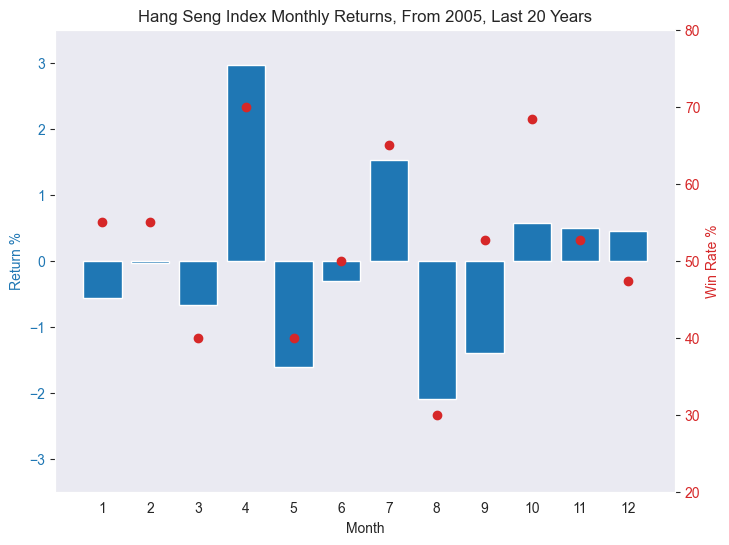

Win Rates: Month
1     50.000000
2     53.333333
3     43.333333
4     66.666667
5     43.333333
6     46.666667
7     60.000000
8     36.666667
9     55.172414
10    68.965517
11    58.620690
12    55.172414
Name: Win Rate %, dtype: float64


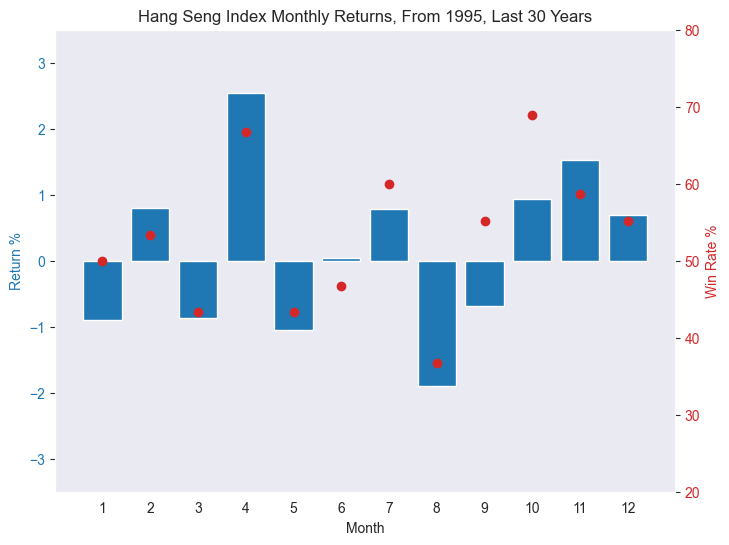

Win Rates: Month
1     55.263158
2     57.894737
3     42.105263
4     65.789474
5     50.000000
6     47.368421
7     60.526316
8     36.842105
9     54.054054
10    70.270270
11    54.054054
12    62.162162
Name: Win Rate %, dtype: float64


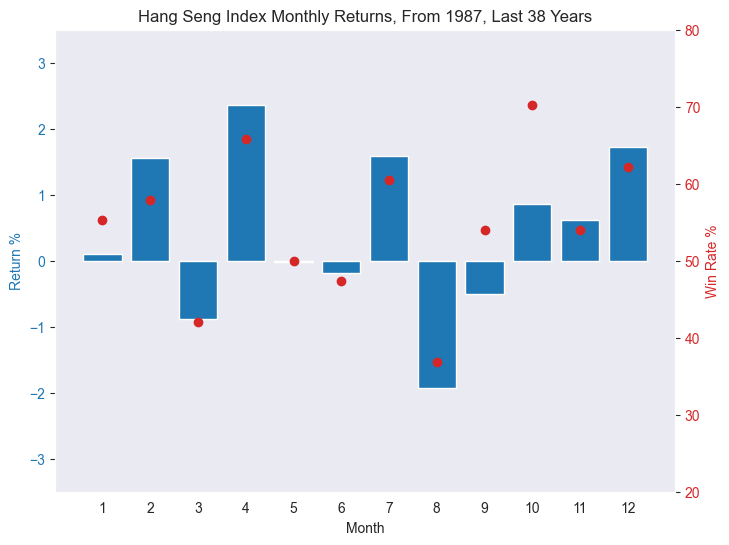

In [5]:
for time in choices:
    _new_df = hsi_monthly[hsi_monthly.index >= time]
    
    avg_returns = _new_df.groupby(_new_df.index.month).mean() * 100
    avg_returns.name = 'Return %'
    avg_returns.index.name = 'Month'
    
    wins = _new_df.groupby(_new_df.index.month).apply(lambda x: (x > 0).sum())
    alls = _new_df.groupby(_new_df.index.month).count()
    win_rates = wins / alls * 100
    win_rates.name = 'Win Rate %'
    win_rates.index.name = 'Month'
    print(f'Win Rates: {win_rates}')
    
    fig, ax1 = plt.subplots(figsize=(8, 6))
    plt.grid(False)
    color = 'tab:blue'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Return %', color=color)
    ax1.bar(x=avg_returns.index, height=avg_returns, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-3.5, 3.5)
    
    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
    plt.grid(False)
    color = 'tab:red'
    ax2.set_ylabel('Win Rate %', color=color)  # we already handled the x-label with ax1
    ax2.scatter(x=win_rates.index, y=win_rates, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(20, 80)
    
    plt.xticks(range(1, 13))
    years = 1 + _new_df.index.year[-1] - _new_df.index.year[0]
    plt.title(f'Hang Seng Index Monthly Returns, From {_new_df.index[0].year}, Last {years} Years')
    # plt.savefig(f'hsi_monthly_returns_last_{years}_years.png')
    plt.show()

Conclusion:
- 4 best months rank by mean / std are month: 4, 12, 7, 2
- October is the month with the highest standard deviation (volatility)
- Month 8, 3, 9, 6, 5 have avg negative returns
- Month 3, 8 are the worst

In [6]:
monthly_df = pd.DataFrame(test_hsi.results['Monthly Return'].copy())
monthly_stats = monthly_df.groupby(monthly_df.index.month).describe()['Monthly Return']
monthly_stats.index.name = 'Month'
monthly_stats = monthly_stats * 100
monthly_stats['count'] /= 100
monthly_stats['mean / std'] = monthly_stats['mean'] / monthly_stats['std']
monthly_stats

,count,mean,std,min,25%,50%,75%,max,mean / std
Month,,,,,,,,,
1,38.0,0.108838,7.381218,-14.893693,-5.570009,0.708198,5.691372,13.529388,0.014745
2,38.0,1.563425,6.013340,-11.978626,-1.857724,1.250924,6.485447,11.481628,0.259993
3,38.0,-0.879580,5.154553,-11.141069,-3.575542,-0.285075,2.075457,10.217688,-0.170641
4,38.0,2.354639,5.988174,-8.363668,-1.186273,1.730765,5.109608,20.412027,0.393215
5,38.0,-0.020078,7.435194,-15.421900,-4.928106,0.010806,3.851170,14.361784,-0.002700
6,38.0,-0.192971,5.399910,-15.468405,-3.713004,-0.262341,3.635697,9.451809,-0.035736
7,38.0,1.583916,6.002740,-10.488869,-2.786778,3.517338,5.438338,13.224416,0.263866
8,38.0,-1.929303,5.445894,-13.700303,-5.097114,-1.348716,2.293343,7.407884,-0.354267
9,37.0,-0.499892,7.438486,-14.539091,-5.987439,0.316441,4.890989,13.547392,-0.067204


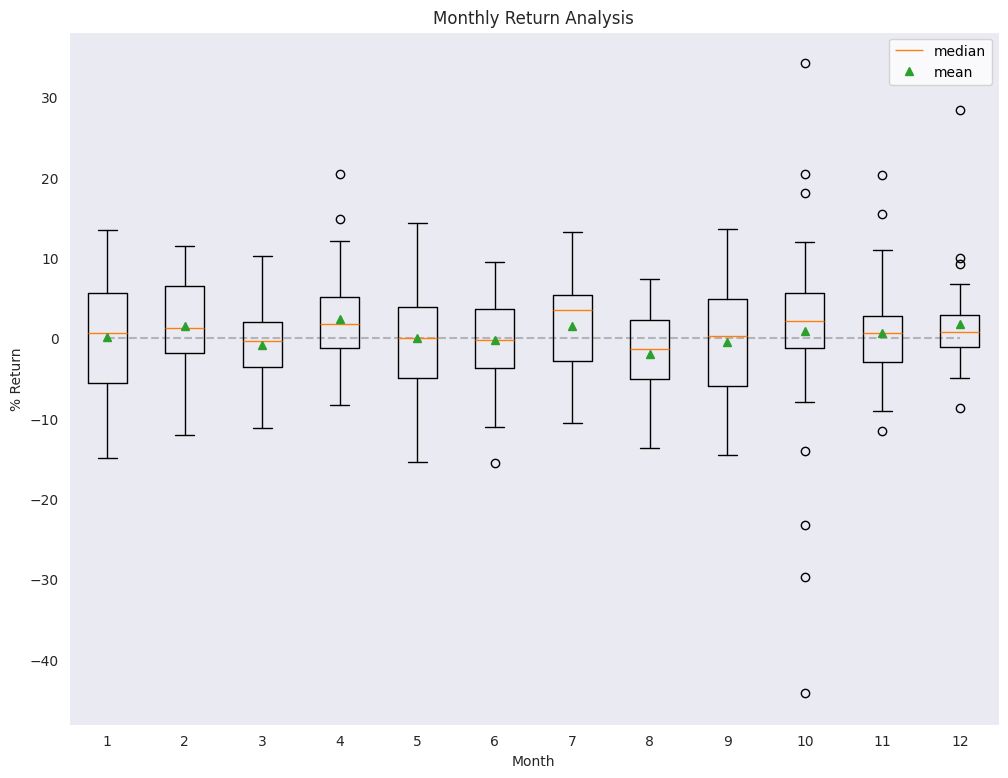

In [7]:
dfs = [_df for _df in monthly_df['Monthly Return'].groupby(monthly_df.index.month)]
array_of_df = []

vals, names, xs = [],[],[]

for _df in dfs:
    new_df: pd.Series = _df[1] * 100
    new_df.name = str(_df[0])
    vals.append(new_df.values.tolist())
    names.append(new_df.name)
    xs.append([int(new_df.name) for i in range(len(new_df.index))])

all_mean = monthly_df['Monthly Return'].mean()

fig, ax = plt.subplots(figsize=(12, 9))
plt.plot([i + 1 for i in range(12)], [all_mean for i in range(12)], alpha=0.5
         , linestyle='--', color='grey', label='overall mean return')
bp = plt.boxplot(vals, showmeans=True, tick_labels=names)

plt.style.use('default')
plt.title('Monthly Return Analysis')
plt.xlabel('Month')
plt.ylabel('% Return')
plt.legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'])
plt.grid(False)
plt.show()